In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

In [3]:
gc = pd.read_csv("C:\\Users\\Vaibhav\\Desktop\\03June\\DataSciencePy\\Datasets\\German_credit_classification.csv")
df = pd.DataFrame(gc)

In [4]:
gc.head(3)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201


In [5]:
#Missing values
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Default            1000 non-null int64
checkingstatus1    1000 non-null object
duration           1000 non-null int64
history            1000 non-null object
purpose            1000 non-null object
amount             1000 non-null int64
savings            1000 non-null object
employ             1000 non-null object
installment        1000 non-null int64
status             1000 non-null object
others             1000 non-null object
residence          1000 non-null int64
property           1000 non-null object
age                1000 non-null int64
otherplans         1000 non-null object
housing            1000 non-null object
cards              1000 non-null int64
job                1000 non-null object
liable             1000 non-null int64
tele               1000 non-null object
foreign            1000 non-null object
dtypes: int64(8), object(13)
memory usage: 164.1+ KB


In [6]:
#if there are missing values in the data - use imputer class for the numerical variables; multiple ways discussed in titanic dataset

In [7]:
#skewed distributions - by taking logarithms / by discretizing the continuous vars

In [8]:
gc.iloc[0,:]

Default               0
checkingstatus1     A11
duration              6
history             A34
purpose             A43
amount             1169
savings             A65
employ              A75
installment           4
status              A93
others             A101
residence             4
property           A121
age                  67
otherplans         A143
housing            A152
cards                 2
job                A173
liable                1
tele               A192
foreign            A201
Name: 0, dtype: object

In [9]:
cat_vars = ["checkingstatus1","history", "purpose", "savings", "employ","status", "others", "property", "otherplans", "housing",\
            "job", "tele", "foreign"]

In [10]:
for cat in cat_vars:
    dummy = pd.get_dummies(gc[cat], prefix=cat+"_", drop_first=True)
    gc = pd.concat([gc, dummy], axis = 1)
print(gc.columns)

Index(['Default', 'checkingstatus1', 'duration', 'history', 'purpose',
       'amount', 'savings', 'employ', 'installment', 'status', 'others',
       'residence', 'property', 'age', 'otherplans', 'housing', 'cards', 'job',
       'liable', 'tele', 'foreign', 'checkingstatus1__A12',
       'checkingstatus1__A13', 'checkingstatus1__A14', 'history__A31',
       'history__A32', 'history__A33', 'history__A34', 'purpose__A41',
       'purpose__A410', 'purpose__A42', 'purpose__A43', 'purpose__A44',
       'purpose__A45', 'purpose__A46', 'purpose__A48', 'purpose__A49',
       'savings__A62', 'savings__A63', 'savings__A64', 'savings__A65',
       'employ__A72', 'employ__A73', 'employ__A74', 'employ__A75',
       'status__A92', 'status__A93', 'status__A94', 'others__A102',
       'others__A103', 'property__A122', 'property__A123', 'property__A124',
       'otherplans__A142', 'otherplans__A143', 'housing__A152',
       'housing__A153', 'job__A172', 'job__A173', 'job__A174', 'tele__A192',
       

In [11]:
gc[:2]

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,0,0,1,1,0,0,1,0,1,0
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,0,0,1,1,0,0,1,0,0,0


In [12]:
gc.shape

(1000, 62)

In [13]:
gc.drop(cat_vars, axis = 1, inplace = True)

In [14]:
gc.iloc[0,:]

Default                    0
duration                   6
amount                  1169
installment                4
residence                  4
age                       67
cards                      2
liable                     1
checkingstatus1__A12       0
checkingstatus1__A13       0
checkingstatus1__A14       0
history__A31               0
history__A32               0
history__A33               0
history__A34               1
purpose__A41               0
purpose__A410              0
purpose__A42               0
purpose__A43               1
purpose__A44               0
purpose__A45               0
purpose__A46               0
purpose__A48               0
purpose__A49               0
savings__A62               0
savings__A63               0
savings__A64               0
savings__A65               1
employ__A72                0
employ__A73                0
employ__A74                0
employ__A75                1
status__A92                0
status__A93                1
status__A94   

In [15]:
#Dummy variable encoding using Label Encoder and One hot encoder

In [16]:
df.head(1)

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201


In [17]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for cat in cat_vars:
    df.loc[:, cat] = encode.fit_transform(df.loc[:,cat])
print(df[cat_vars].head(3))

   checkingstatus1  history  purpose  savings  employ  status  others  \
0                0        4        4        4       4       2       0   
1                1        2        4        0       2       1       0   
2                3        4        7        0       3       2       0   

   property  otherplans  housing  job  tele  foreign  
0         0           2        1    2     1        0  
1         0           2        1    2     0        0  
2         0           2        1    1     0        0  


In [18]:
for cat in cat_vars:
    print(df.groupby(cat)['Default'].count(), "\n")

checkingstatus1
0    274
1    269
2     63
3    394
Name: Default, dtype: int64 

history
0     40
1     49
2    530
3     88
4    293
Name: Default, dtype: int64 

purpose
0    234
1    103
2     12
3    181
4    280
5     12
6     22
7     50
8      9
9     97
Name: Default, dtype: int64 

savings
0    603
1    103
2     63
3     48
4    183
Name: Default, dtype: int64 

employ
0     62
1    172
2    339
3    174
4    253
Name: Default, dtype: int64 

status
0     50
1    310
2    548
3     92
Name: Default, dtype: int64 

others
0    907
1     41
2     52
Name: Default, dtype: int64 

property
0    282
1    232
2    332
3    154
Name: Default, dtype: int64 

otherplans
0    139
1     47
2    814
Name: Default, dtype: int64 

housing
0    179
1    713
2    108
Name: Default, dtype: int64 

job
0     22
1    200
2    630
3    148
Name: Default, dtype: int64 

tele
0    596
1    404
Name: Default, dtype: int64 

foreign
0    963
1     37
Name: Default, dtype: int64 



In [19]:
cn = np.where(df.columns.isin(cat_vars))
df.columns[cn]

Index(['checkingstatus1', 'history', 'purpose', 'savings', 'employ', 'status',
       'others', 'property', 'otherplans', 'housing', 'job', 'tele',
       'foreign'],
      dtype='object')

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[cn])

In [21]:
arr = ohe.fit_transform(df).toarray()

In [22]:
arr.shape

(1000, 62)

In [23]:
##### Split the data into train test

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train, test = train_test_split(gc, test_size = .3, random_state = 2)
X_train = train.drop(['Default'], axis = 1)
y_train = train[['Default']] #dataframe required since X is 2 -d

X_test = test.drop(['Default'], axis = 1)
y_test = test[['Default']] #dataframe required since X is 2 -d

In [26]:
y_train.head(2)

,Default
90,0
305,0


In [27]:
y_train.Default.value_counts()

0    499
1    201
Name: Default, dtype: int64

In [28]:
#baseline accuracy
baseline = 499/y_train.shape[0]
baseline

0.7128571428571429

In [29]:
## standardization of data - for continuous columns

In [30]:
from sklearn import preprocessing as pp

In [31]:
X_train.head(2)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,checkingstatus1__A14,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
90,12,618,4,4,56,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
305,6,1543,4,2,33,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0


In [32]:
train_std = pp.scale(X_train)
test_std = pp.scale(X_test)

In [33]:
scaler = pp.StandardScaler()

In [34]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
X_train_std = scaler.transform(X_train)

In [36]:
X_test_std = scaler.transform(X_test)

In [37]:
X_train_std

array([[-0.70642969, -0.93138352,  0.91950968, ..., -0.39384707,
        -0.82136542, -0.20029696],
       [-1.21430452, -0.59407936,  0.91950968, ..., -0.39384707,
        -0.82136542, -0.20029696],
       [-0.70642969, -0.90111731,  0.91950968, ..., -0.39384707,
        -0.82136542, -0.20029696],
       ...,
       [-1.21430452, -1.02254681,  0.91950968, ..., -0.39384707,
        -0.82136542, -0.20029696],
       [-1.38359613, -0.60866549, -0.85609522, ..., -0.39384707,
        -0.82136542, -0.20029696],
       [ 0.30931995,  0.29166313, -0.85609522, ..., -0.39384707,
         1.21748491, -0.20029696]])

In [38]:
train_std = np.c_[y_train.values, X_train_std]

In [39]:
train.head(1)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
90,0,12,618,4,4,56,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0


In [40]:
train = pd.DataFrame(train_std, columns = train.columns)

In [41]:
test_std = np.c_[y_test.values, X_test_std]

In [42]:
test = pd.DataFrame(test_std, columns = test.columns)

In [43]:
train.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,0.0,-0.706430,-0.931384,0.91951,1.032437,1.788554,-0.703434,-0.445679,-0.583949,-0.252646,...,-0.410627,-0.21887,0.491055,0.63467,-0.3386,-0.526661,0.77106,-0.393847,-0.821365,-0.200297
1,0.0,-1.214305,-0.594079,0.91951,-0.797198,-0.215742,-0.703434,-0.445679,-0.583949,-0.252646,...,-0.410627,-0.21887,0.491055,0.63467,-0.3386,-0.526661,0.77106,-0.393847,-0.821365,-0.200297


In [44]:
test.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,1.0,-0.198555,-0.390968,0.919510,-0.797198,0.132831,-0.703434,-0.445679,-0.583949,3.958114,...,-0.410627,4.568917,-2.036433,0.63467,-0.3386,-0.526661,0.771060,-0.393847,-0.821365,-0.200297
1,0.0,-0.452492,-0.676856,-0.856095,-0.797198,1.004264,1.093660,-0.445679,-0.583949,-0.252646,...,-0.410627,-0.218870,0.491055,0.63467,-0.3386,1.898753,-1.296916,-0.393847,-0.821365,-0.200297


### Minmax scaler

In [45]:
X_train.head(2)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,checkingstatus1__A14,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
90,12,618,4,4,56,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
305,6,1543,4,2,33,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0


In [46]:
scaler = pp.MinMaxScaler()

In [47]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [48]:
X_train_std = scaler.transform(X_train)

In [49]:
X_test_std = scaler.transform(X_test)

In [50]:
X_train_std

array([[0.14285714, 0.02024871, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03571429, 0.07114559, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.02481567, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03571429, 0.00649279, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06894465, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.35714286, 0.20479806, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [51]:
train_std = np.c_[y_train.values, X_train_std]

In [52]:
train.head(1)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,0.0,-0.70643,-0.931384,0.91951,1.032437,1.788554,-0.703434,-0.445679,-0.583949,-0.252646,...,-0.410627,-0.21887,0.491055,0.63467,-0.3386,-0.526661,0.77106,-0.393847,-0.821365,-0.200297


In [53]:
train = pd.DataFrame(train_std, columns = train.columns)


In [54]:
test_std = np.c_[y_test.values, X_test_std]

In [55]:
test = pd.DataFrame(test_std, columns = test.columns)

In [56]:
train.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,0.0,0.142857,0.020249,1.0,1.000000,0.660714,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.035714,0.071146,1.0,0.333333,0.250000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [57]:
test.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,1.0,0.250000,0.101794,1.000000,0.333333,0.321429,0.000000,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.196429,0.058655,0.333333,0.333333,0.500000,0.333333,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
####LOGISTIC REGRESSION

In [59]:
from statsmodels.formula.api import glm
import statsmodels.api as sm

In [60]:
X_train

,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,checkingstatus1__A14,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
90,12,618,4,4,56,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
305,6,1543,4,2,33,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
126,12,701,4,2,40,1,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
963,24,2397,3,2,35,2,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
163,10,7308,2,4,70,1,1,1,0,0,...,1,0,0,0,1,0,0,1,1,0
111,15,392,4,4,23,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
702,24,1377,4,2,47,1,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
859,9,3577,1,2,26,1,2,0,0,1,...,0,0,1,0,0,0,1,0,0,1
868,36,7409,3,2,37,2,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
453,24,2670,4,4,35,1,1,0,0,1,...,0,0,1,1,0,0,0,1,1,0


In [61]:
mod_log = glm(formula = 'Default ~ duration', data = train, family = sm.families.Binomial())

In [62]:
mod_fit = mod_log.fit()

In [63]:
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      698
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -409.23
Date:                Wed, 19 Jun 2019   Deviance:                       818.47
Time:                        10:14:08   Pearson chi2:                     698.
No. Iterations:                     4   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4501      0.150     -9.684      0.000      -1.744      -1.157
duration       1.7632      0.386      4.562      0.000       1.006       2.521
==============================================================================
"""

In [64]:
train.shape, test.shape

((700, 49), (300, 49))

In [65]:
features = '+'.join(train.columns[1:])
features

'duration+amount+installment+residence+age+cards+liable+checkingstatus1__A12+checkingstatus1__A13+checkingstatus1__A14+history__A31+history__A32+history__A33+history__A34+purpose__A41+purpose__A410+purpose__A42+purpose__A43+purpose__A44+purpose__A45+purpose__A46+purpose__A48+purpose__A49+savings__A62+savings__A63+savings__A64+savings__A65+employ__A72+employ__A73+employ__A74+employ__A75+status__A92+status__A93+status__A94+others__A102+others__A103+property__A122+property__A123+property__A124+otherplans__A142+otherplans__A143+housing__A152+housing__A153+job__A172+job__A173+job__A174+tele__A192+foreign__A202'

In [66]:
formula = 'Default ~ '+features

In [67]:
mod_fit = glm(formula = formula, data = train, family = sm.families.Binomial()).fit()

In [68]:
mod_fit.aic

697.9019679119301

In [69]:
mod_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      651
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -299.95
Date:                Wed, 19 Jun 2019   Deviance:                       599.90
Time:                        10:14:09   Pearson chi2:                     679.
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0951      1.331     -0.071      0.943      -2.704       2.513
duration                 1.3727      0.661      2.075      0.038       0.076       2.669
amount                   2.3507      1.052      2.235      0.025       0.289       4.412
installment              0.9638      0.330      2.923      0.003       0.317       1.610
residence                0.2543      0.323      0.787      0.431      -0.379       0.888
age                     -0.8368      0.641     -1.305      0.192      -2.093       0.420
cards                   -0.0503      0.782     -0.064      0.949      -1.583       1.482
liable                   0.5392      0.297      1.817      0.069      -0.042       1.121
checkingstatus1__A12    -0.2249      0.269     -0.837      0.402      -0.751       0.302
checkingstatus1__A13    -1.7169      0.555     -3.095      0.002      -2.804      -0.630
checkingstatus1__A14    -1.5508      0.277     -5.594      0.000      -2.094      -1.007
history__A31            -0.0076      0.691     -0.011      0.991      -1.362       1.347
history__A32            -0.4381      0.548     -0.800      0.424      -1.512       0.635
history__A33            -0.6814      0.592     -1.151      0.250      -1.842       0.479
history__A34            -1.1647      0.550     -2.116      0.034      -2.243      -0.086
purpose__A41            -2.2177      0.521     -4.253      0.000      -3.240      -1.196
purpose__A410           -1.2854      0.903     -1.424      0.155      -3.055       0.484
purpose__A42            -0.7687      0.317     -2.428      0.015      -1.389      -0.148
purpose__A43            -0.9039      0.308     -2.939      0.003      -1.507      -0.301
purpose__A44            -0.2707      0.791     -0.342      0.732      -1.822       1.281
purpose__A45             0.3374      0.667      0.506      0.613      -0.969       1.644
purpose__A46            -0.2229      0.478     -0.466      0.641      -1.160       0.714
purpose__A48            -1.1666      1.250     -0.933      0.351      -3.617       1.284
purpose__A49            -0.7676      0.429     -1.789      0.074      -1.609       0.073
savings__A62            -0.3097      0.367     -0.844      0.399      -1.029       0.410
savings__A63            -0.4363      0.497     -0.878      0.380      -1.410       0.538
savings__A64            -1.0452      0.602     -1.736      0.083      -2.225       0.135
savings__A65            -1.0650      0.329     -3.236      0.001      -1.710      -0.420
employ__A72             -0.2766      0.531     -0.521      0.602      -1.317       0.763
employ__A73             -0.1578      0.499     -0.316      0.752      -1.136       0.821
employ__A74             -1.2060      0.553     -2.182      0.029      -2.289      -0.123
employ__A75             -0.3927      0.509     -0.771      0.440      -1.390       0.605
status__A92             -0.2412      0.474     

In [70]:
mod_fit.pvalues

Intercept               9.430606e-01
duration                3.794337e-02
amount                  2.540921e-02
installment             3.469611e-03
residence               4.312532e-01
age                     1.918451e-01
cards                   9.487102e-01
liable                  6.915832e-02
checkingstatus1__A12    4.023565e-01
checkingstatus1__A13    1.966438e-03
checkingstatus1__A14    2.213222e-08
history__A31            9.912718e-01
history__A32            4.237987e-01
history__A33            2.499350e-01
history__A34            3.434632e-02
purpose__A41            2.108879e-05
purpose__A410           1.545020e-01
purpose__A42            1.518829e-02
purpose__A43            3.292617e-03
purpose__A44            7.323676e-01
purpose__A45            6.127822e-01
purpose__A46            6.410092e-01
purpose__A48            3.507965e-01
purpose__A49            7.361326e-02
savings__A62            3.987709e-01
savings__A63            3.799369e-01
savings__A64            8.251041e-02
s

In [71]:
p = mod_fit.predict(test)
p[:3]

0    0.143990
1    0.039848
2    0.138109
dtype: float64

In [72]:
p.shape

(300,)

In [73]:
test['prob'] = p

In [74]:
def class_conversion(prob):
    if prob>=.5:
        return 1
    else:
        return 0
    

In [75]:
test['class_label'] = test.prob.apply(class_conversion)

In [76]:
test.class_label[:3]

0    0
1    0
2    0
Name: class_label, dtype: int64

In [77]:
test[['Default', 'class_label']][:4]

,Default,class_label
0,1.0,0
1,0.0,0
2,1.0,0
3,1.0,1


In [78]:
#Performance Metrics

In [79]:
table = pd.crosstab(test.class_label, test.Default)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [81]:
confusion_matrix(test.Default, test.class_label)

array([[172,  29],
       [ 54,  45]], dtype=int64)

In [82]:
accuracy_score(test.Default, test.class_label)

0.7233333333333334

In [83]:
(172+45)/test.shape[0]

0.7233333333333334

In [84]:
#to improve accuracy in the model
#1. take out the insignificant variables (having p value < 5%) from the model since they are leading to over-fitting
#2. also take out the inter-correlated independent variables so as to remove the multi-collinearity from the model, 
#this will improve the variance accuracy

TP = correctly identified as +ve (1 label)

In [85]:
table

Default,0.0,1.0
class_label,,
0,172,54
1,29,45


In [86]:
table = pd.DataFrame(table)
table

Default,0.0,1.0
class_label,,
0,172,54
1,29,45


In [87]:
TP = table.iloc[1,1]
TN = table.iloc[0,0]
FP = table.iloc[1,0]
FN = table.iloc[0,1]

In [88]:
Senstitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)
Senstitivity,Specificity,Precision

(0.45454545454545453, 0.8557213930348259, 0.6081081081081081)

In [89]:
import sklearn.metrics as skm

In [90]:
skm.f1_score(test.Default,test.class_label)

0.5202312138728323

In [91]:
print(skm.classification_report(test.Default, test.class_label))

             precision    recall  f1-score   support

        0.0       0.76      0.86      0.81       201
        1.0       0.61      0.45      0.52        99

avg / total       0.71      0.72      0.71       300



#here we'll consider true and false '0' and true and false '1'. So, a tp is when the actual class is same as estimated class.
#FP will be when actual class is negative but the estimated class is +ve


Consider 0 as the positive class:
then 
    0   1
0   TP  Fp 
1   FN  TN

In [93]:
X_test.head(2)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,checkingstatus1__A14,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
37,18,2100,4,2,37,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0
726,15,1316,2,2,47,2,1,0,0,1,...,0,0,1,1,0,1,0,0,0,0


In [102]:
#Delete the extra features created in the X_test
test.drop(['prob', 'class_label'], axis = 1, inplace=True)
test.shape

(300, 49)

---

In [103]:
#Decision Trees

In [104]:
from sklearn import tree

In [105]:
dt = tree.DecisionTreeClassifier()

In [106]:
train.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,0.0,0.142857,0.020249,1.0,1.000000,0.660714,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.035714,0.071146,1.0,0.333333,0.250000,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [107]:
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]
X_train.head(3)

,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,checkingstatus1__A14,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,0.142857,0.020249,1.0,1.000000,0.660714,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.035714,0.071146,1.0,0.333333,0.250000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.142857,0.024816,1.0,0.333333,0.375000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [108]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
#if test is having extra columns prob and class_labels then please delete them
y_pred = dt.predict(X_test)

In [110]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], d

In [111]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [112]:
accuracy_score(test.Default, y_pred)

0.7033333333333334

In [113]:
accuracy_score(train.Default, dt.predict(X_train))#over-fitted model

1.0

In [114]:
#Visualization of the tree

In [115]:
!pip install graphviz
#!pip / !conda install <packagename>

In [116]:
from sklearn.tree import export_graphviz
import graphviz

In [117]:
dot_data = tree.export_graphviz(dt, out_file= None, feature_names=X_train.columns, filled=True, rounded=True, 
                                class_names=['Non Defaulter', 'Defaulter'])

In [118]:
graph = graphviz.Source(dot_data)

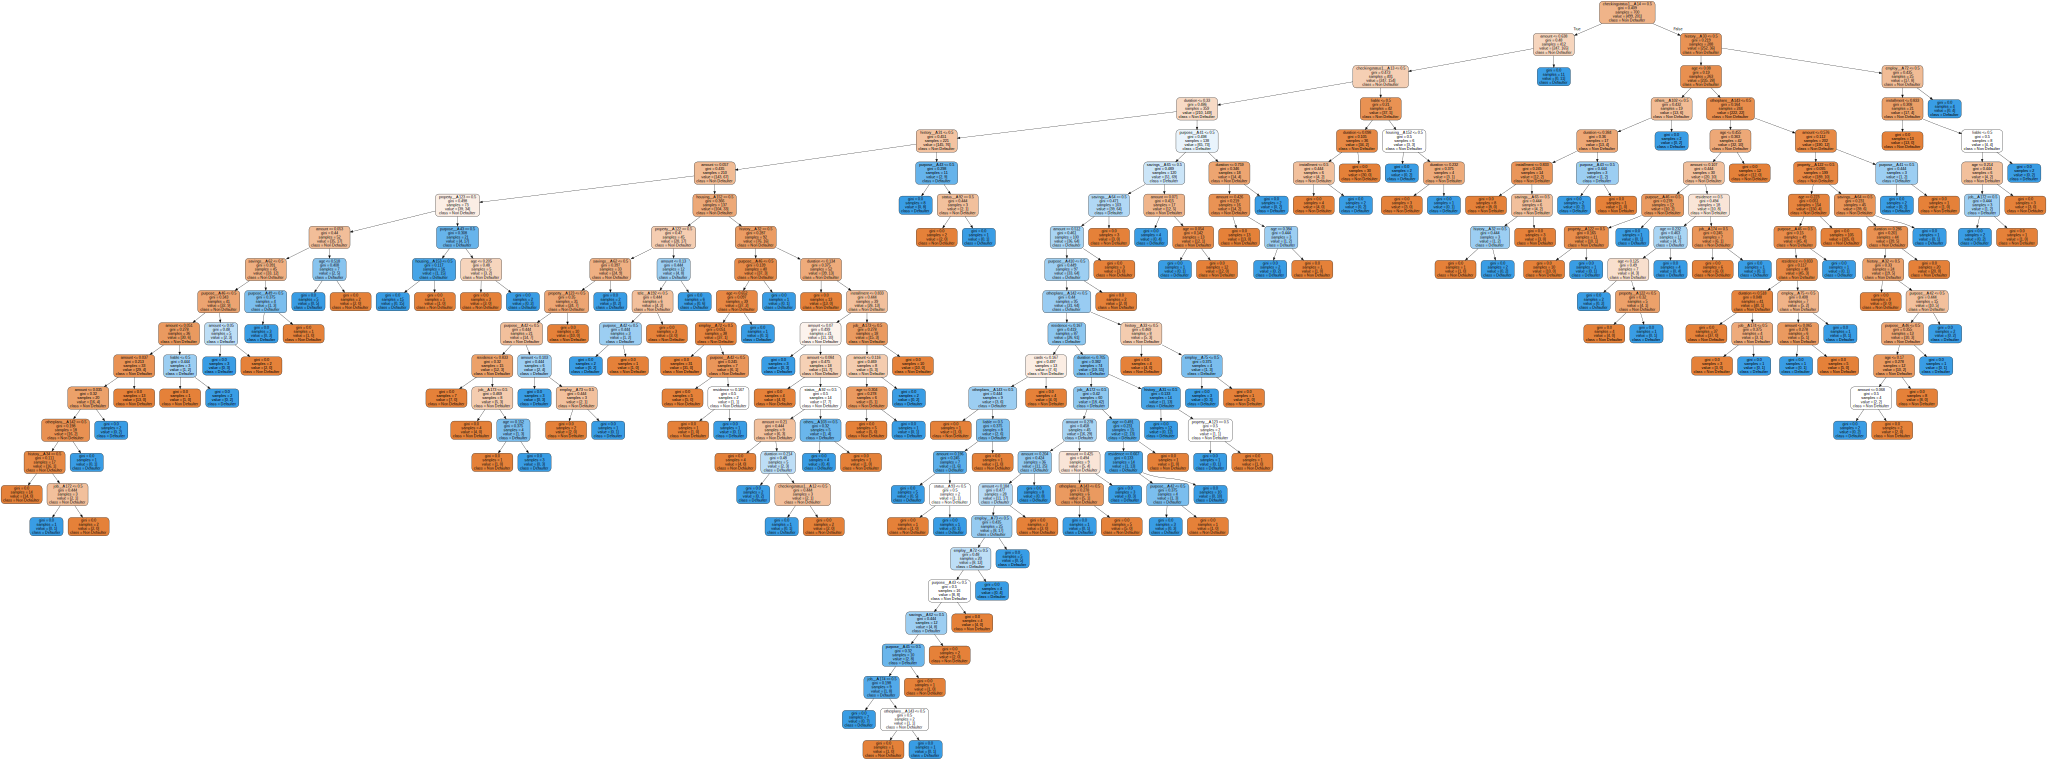

In [119]:
graph

In [120]:
graph.render('dcsn')

'dcsn.pdf'

In [121]:
dt = tree.DecisionTreeClassifier(min_samples_leaf= 15, min_samples_split=45)
#min samples leaf - min. no. of samples required at a node to qualify as a terminal node - ie if number 
#of samples in a node is 15, then that node is qualified to be a leaf node. 
#generally it is taken 2 - 3% of the number of rows
#min_samples_split - min number of samples required for it to go for a split

In [122]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=45,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [123]:
#if test is having extra columns prob and class_labels then please delete them
y_pred = dt.predict(X_test)

In [124]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [125]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [126]:
accuracy_score(test.Default, y_pred)

0.6866666666666666

In [127]:
accuracy_score(train.Default, dt.predict(X_train))

0.7771428571428571

In [128]:
#Visualization of the tree

In [130]:
from sklearn.tree import export_graphviz
import graphviz

In [131]:
dot_data = tree.export_graphviz(dt, out_file= None, feature_names=X_train.columns, filled=True, rounded=True, 
                                class_names=['Non Defaulter', 'Defaulter'])

In [132]:
graph = graphviz.Source(dot_data)

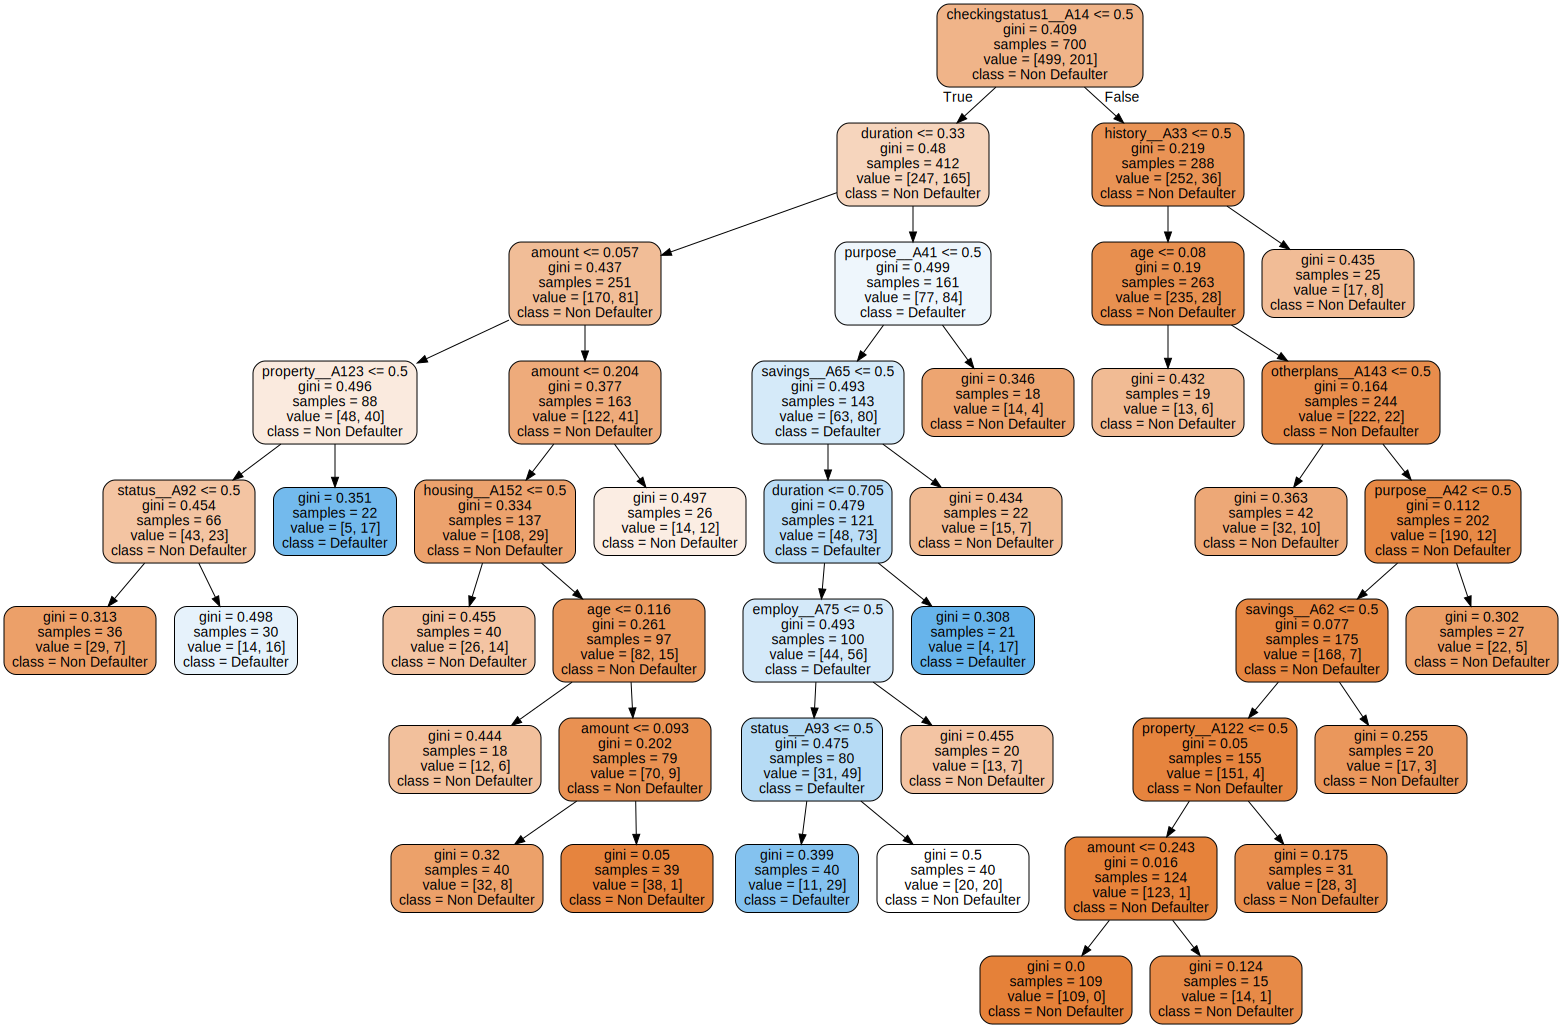

In [133]:
graph

In [134]:
graph.render('dcsn2')

'dcsn2.pdf'

----

In [135]:
#KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
gc.head(3)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,0,6,1169,4,4,67,2,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,1,48,5951,2,2,22,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,0,12,2096,2,3,49,1,2,0,0,...,0,0,1,1,0,1,0,0,0,0


In [138]:
cont_vars = ['duration', 'amount', 'installment', 'residence', 'age', 'cards', 'liable']

In [139]:
#y_train

In [141]:
gc.head(2)

,Default,duration,amount,installment,residence,age,cards,liable,checkingstatus1__A12,checkingstatus1__A13,...,property__A124,otherplans__A142,otherplans__A143,housing__A152,housing__A153,job__A172,job__A173,job__A174,tele__A192,foreign__A202
0,0,6,1169,4,4,67,2,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,1,48,5951,2,2,22,1,1,1,0,...,0,0,1,1,0,0,1,0,0,0


In [153]:
train, test = train_test_split(gc, test_size = .3, random_state = 2)
X_train = train.drop(['Default'], axis = 1)
y_train = train.Default 

X_test = test.drop(['Default'], axis = 1)
y_test = test.Default

In [154]:
sc = pp.StandardScaler()
X_train_std = sc.fit_transform(X_train[cont_vars])
X_test_std = sc.fit_transform(X_test[cont_vars])
X_train_std[0]

array([-0.70642969, -0.93138352,  0.91950968,  1.03243719,  1.78855396,
       -0.70343411, -0.44567941])

In [155]:
X_test_std[0]

array([-0.33636859, -0.46987545,  0.91643154, -0.69700418,  0.11602995,
       -0.71284218, -0.38655567])

In [156]:
for k_value in range(1,30,2):
    neigh = KNeighborsClassifier(n_neighbors=k_value)
    neigh.fit(X_train_std, y_train)
    y_pred = neigh.predict(X_test_std)
    print("Accuracy is {} for k-value:{}".format(round(accuracy_score(test.Default, y_pred),2), k_value))

Accuracy is 0.61 for k-value:1
Accuracy is 0.62 for k-value:3
Accuracy is 0.63 for k-value:5
Accuracy is 0.63 for k-value:7
Accuracy is 0.63 for k-value:9
Accuracy is 0.64 for k-value:11
Accuracy is 0.63 for k-value:13
Accuracy is 0.64 for k-value:15
Accuracy is 0.65 for k-value:17
Accuracy is 0.66 for k-value:19
Accuracy is 0.65 for k-value:21
Accuracy is 0.65 for k-value:23
Accuracy is 0.66 for k-value:25
Accuracy is 0.66 for k-value:27
Accuracy is 0.66 for k-value:29
